 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set Path for whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")

# Reading whale returns as dataframe
whale_returns_df = pd.read_csv(whale_returns_path, index_col = 'Date', parse_dates = True)
whale_returns_df.sort_index(inplace = True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Set Path for algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")

# Reading algorithmic returns as dataframe
algo_returns_df = pd.read_csv(algo_returns_path, index_col = "Date", parse_dates = True)
algo_returns_df.sort_index(inplace = True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Set Path for S&P TSX 60
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")

# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col = "Date", parse_dates = True)
sp_tsx_df.sort_index(inplace = True)

sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Remove '$' and ',' from the Closing Prices
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")

# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

<ipython-input-10-7a0727b4477c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


In [11]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()

In [12]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna()

sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns = {"Close":"S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns], axis = "columns", join = "inner")

In [15]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Combined Portfolios and S&P TSX 60 from 2015 to 2019'}, xlabel='Date'>

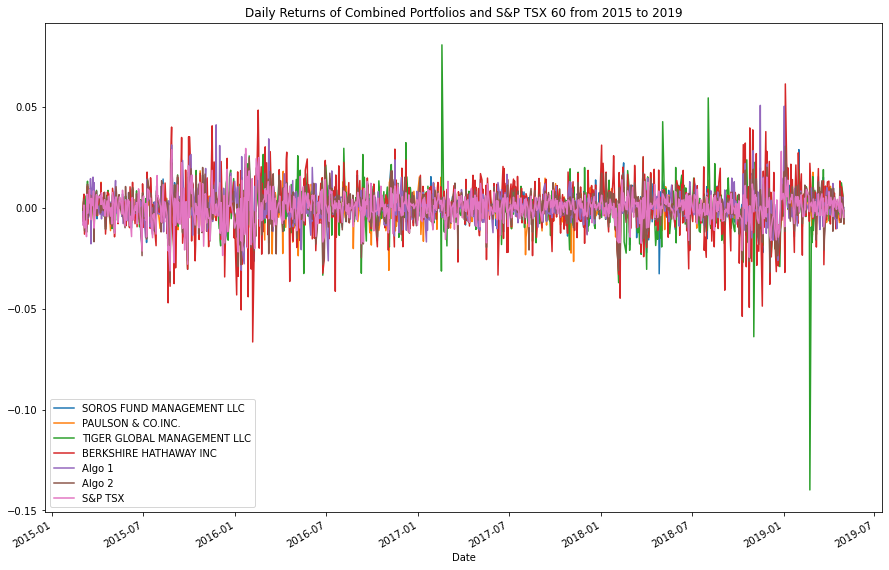

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (15,10), title = "Daily Returns of Combined Portfolios and S&P TSX 60 from 2015 to 2019")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Combined Portfolios and S&P TSX 60 from 2015 to 2019'}, xlabel='Date'>

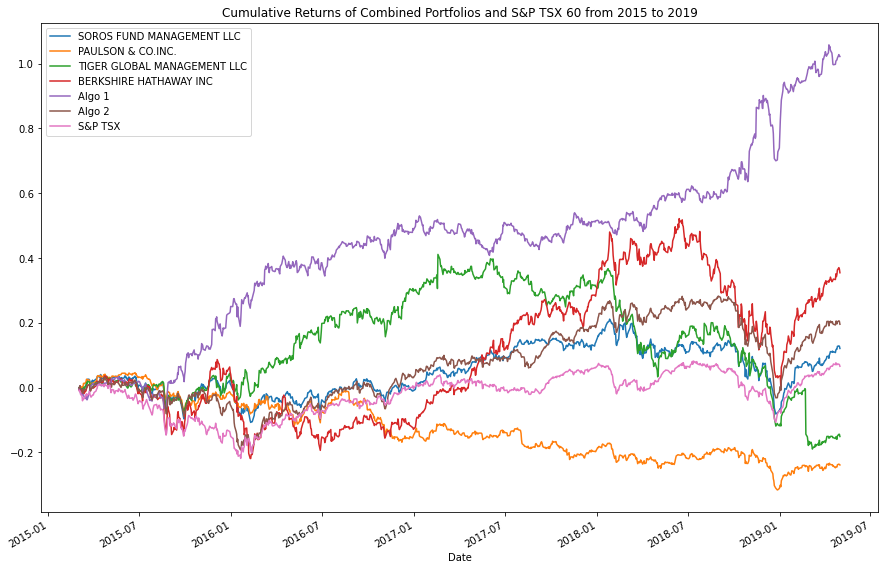

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize = (15,10), title = "Cumulative Returns of Combined Portfolios and S&P TSX 60 from 2015 to 2019")

Soros Fund Management LLC, Algorithm 2, Berkshire Hathaway Inc and Algorithm 1 outperform the S&P TSX 60

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

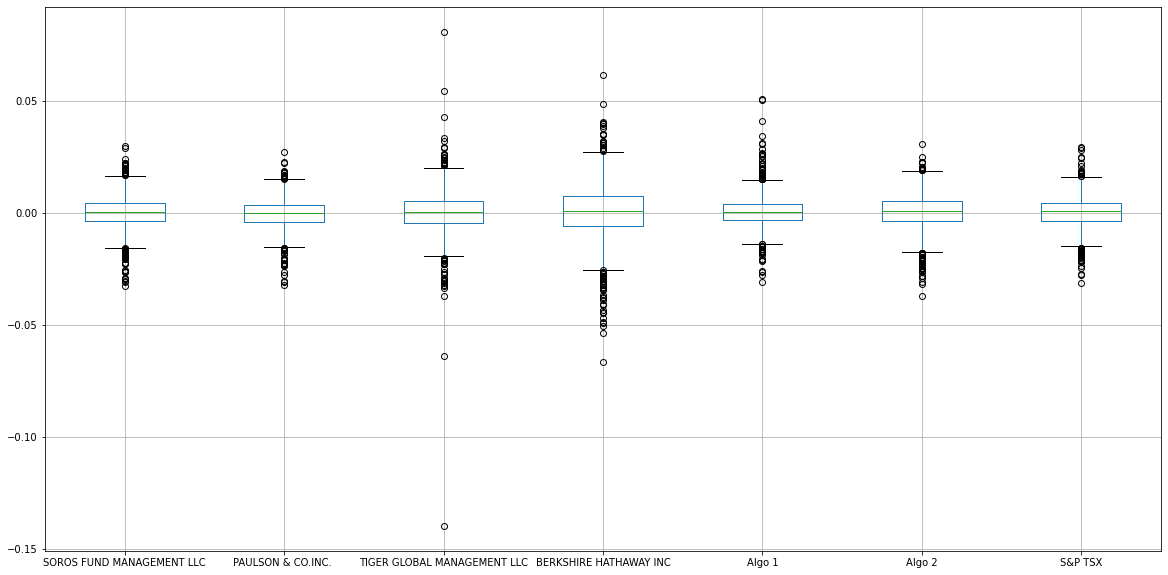

In [18]:
# Box plot to visually show risk
combined_returns.boxplot(figsize = (20, 10))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = combined_returns.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"The daily standard deviation of S&P TSX 60 is {portfolio_std['S&P TSX']:6f}.")

# Determine which portfolios are riskier than the S&P TSX 60
print(portfolio_std.sort_values(ascending = False))

print(f"Berkshire Hathaway Inc, Tiger Global Management LLC, Algorithm 2, Soros Fund Management LLC and Algorithm 1 have a higher risk than the S&P TSX 60")

The daily standard deviation of S&P TSX 60 is 0.007034.
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64
Berkshire Hathaway Inc, Tiger Global Management LLC, Algorithm 2, Soros Fund Management LLC and Algorithm 1 have a higher risk than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = combined_returns.std() * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Combined Portfolios from 2015 to 2019'}, xlabel='Date'>

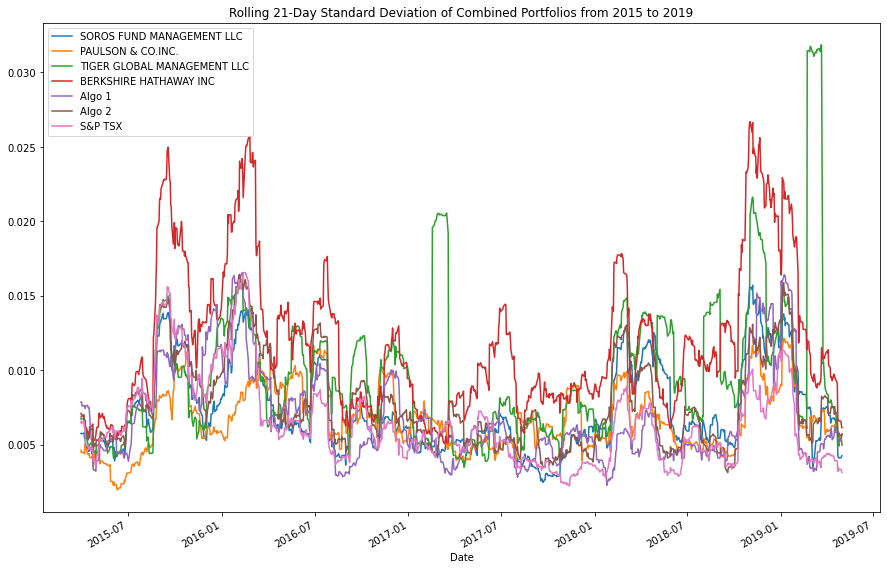

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_std = combined_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_combined_std.plot(figsize = (15,10), title = "Rolling 21-Day Standard Deviation of Combined Portfolios from 2015 to 2019")

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
combined_correlation = combined_returns.corr()

# Display de correlation matrix
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

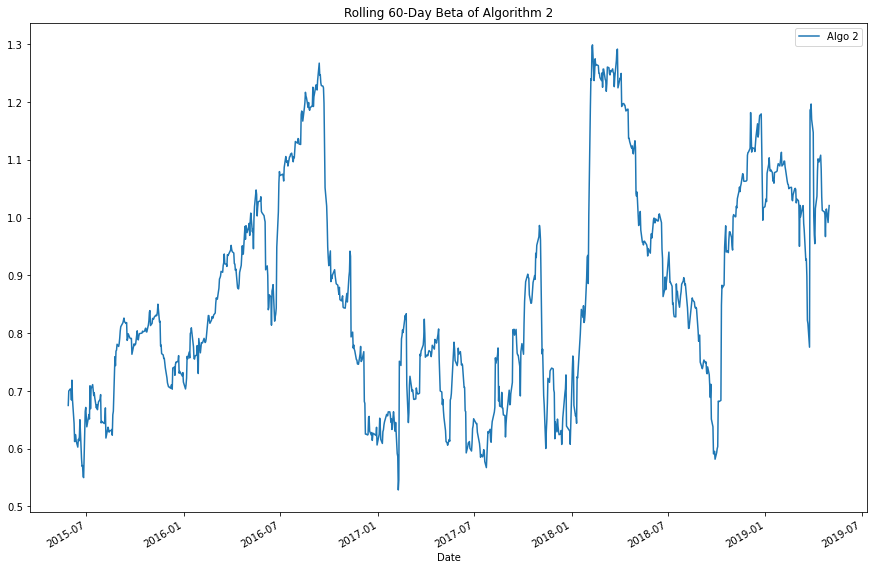

In [24]:
# Calculate covariance of a single portfolio
algo2_covariance = combined_returns["Algo 2"].cov(combined_returns["S&P TSX"])

# Calculate variance of S&P TSX

sp_tsx_variance = combined_returns["S&P TSX"].var()

# Computing 60-Day beta
algo2_beta = algo2_covariance / sp_tsx_variance

rolling_algo2_covariance = combined_returns["Algo 2"].rolling(window=60).cov(combined_returns["S&P TSX"])

rolling_sp_tsx_variance = combined_returns["S&P TSX"].rolling(window = 60).var()

rolling_algo2_beta = rolling_algo2_covariance / rolling_sp_tsx_variance

# Plot 60-Day beta trend
algo2_plot = rolling_algo2_beta.plot(figsize = (15,10), title = "Rolling 60-Day Beta of Algorithm 2")
algo2_plot.legend(["Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife = "21 days").mean()

ValueError: halflife can only be a timedelta convertible argument if times is not None.

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
combined_sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Combined Portfolios and S&P TSX 60 Sharpe Ratios'}>

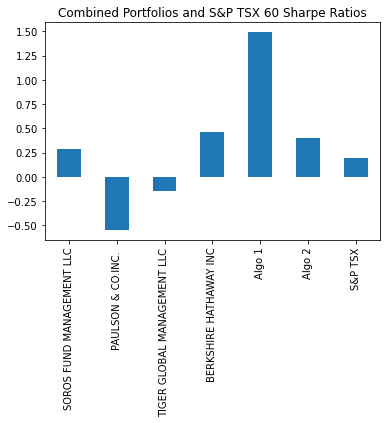

In [28]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = "bar", title = "Combined Portfolios and S&P TSX 60 Sharpe Ratios")

In [29]:
### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

whale_sharpe_avg = combined_sharpe_ratios[0:4].mean()
algo_sharpe_avg = combined_sharpe_ratios[4:6].mean()

print(f"Whale portfolio average sharpe ratio is {whale_sharpe_avg:.8f}")
print(f"Algorithm strategy average sharpe ratio is {algo_sharpe_avg:.8f}")
print(f"S&P TSX 60 sharpe ratio is {combined_sharpe_ratios[6]:.8f}")

print(f"The algorithmic strategies are outperforming both the market and whale portfolios.")

Whale portfolio average sharpe ratio is 0.01542620
Algorithm strategy average sharpe ratio is 0.94416554
S&P TSX 60 sharpe ratio is 0.19555029
The algorithmic strategies are outperforming both the market and whale portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [26]:
# Reading data from 1st stock
# Set Path for atvi_historical
atvi_path = Path("./Resources/atvi_historical.csv")

# Reading atvi_path as dataframe
atvi_df = pd.read_csv(atvi_path, index_col = "Date", parse_dates = True)
atvi_df.head()

,Close
Date,
2018-01-02,64.31
2018-01-03,65.31
2018-01-04,64.66
2018-01-05,66.37
2018-01-08,66.63


In [30]:
# Check data types
atvi_df.dtypes

Close    float64
dtype: object

In [31]:
# Calculate daily returns for ATVI closing prices
atvi_returns = atvi_df.pct_change()

# Drop nulls
atvi_returns = atvi_returns.dropna()

# Change column name to "ATVI"
atvi_returns = atvi_returns.rename(columns = {"Close":"ATVI"})
atvi_returns.head()

,ATVI
Date,
2018-01-03,0.015550
2018-01-04,-0.009953
2018-01-05,0.026446
2018-01-08,0.003917
2018-01-09,-0.006604


In [33]:
# Reading data from 2nd stock
# Set Path for ea_historical
ea_path = Path("./Resources/ea_historical.csv")

# Reading ea_path as dataframe
ea_df = pd.read_csv(ea_path, index_col = "Date", parse_dates = True)
ea_df.head()

,Close
Date,
2018-01-02,109.45
2018-01-03,109.75
2018-01-04,107.19
2018-01-05,112.39
2018-01-08,113.22


In [34]:
# Check data types
ea_df.dtypes

Close    float64
dtype: object

In [35]:
# Calculate daily returns for EA closing prices
ea_returns = ea_df.pct_change()

# Drop nulls
ea_returns = ea_returns.dropna()

# Change column name to "EA"
ea_returns = ea_returns.rename(columns = {"Close":"EA"})
ea_returns.head()

,EA
Date,
2018-01-03,0.002741
2018-01-04,-0.023326
2018-01-05,0.048512
2018-01-08,0.007385
2018-01-09,-0.009186


In [36]:
# Reading data from 3rd stock
# Set Path for atvi_historical
ttwo_path = Path("./Resources/ttwo_historical.csv")

# Reading atvi_path as dataframe
ttwo_df = pd.read_csv(ttwo_path, index_col = "Date", parse_dates = True)
ttwo_df.head()

,Close
Date,
2018-01-02,112.88
2018-01-03,113.88
2018-01-04,114.02
2018-01-05,116.91
2018-01-08,117.37


In [37]:
# Check data types
ttwo_df.dtypes

Close    float64
dtype: object

In [42]:
# Calculate daily returns for TTWO closing prices
ttwo_returns = ttwo_df.pct_change()

# Drop nulls
ttwo_returns = ttwo_returns.dropna()

# Change column name to "TTWO"
ttwo_returns = ttwo_returns.rename(columns = {"Close":"TTWO"})
ttwo_returns.head()

,TTWO
Date,
2018-01-03,0.008859
2018-01-04,0.001229
2018-01-05,0.025346
2018-01-08,0.003935
2018-01-09,-0.020959


In [51]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([atvi_returns, ea_returns, ttwo_returns], axis = "columns", join = "inner")

In [52]:
# Display sample data
custom_portfolio.head()

,ATVI,EA,TTWO
Date,,,
2018-01-03,0.015550,0.002741,0.008859
2018-01-04,-0.009953,-0.023326,0.001229
2018-01-05,0.026446,0.048512,0.025346
2018-01-08,0.003917,0.007385,0.003935
2018-01-09,-0.006604,-0.009186,-0.020959


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [53]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-01-03    0.009050
2018-01-04   -0.010683
2018-01-05    0.033435
2018-01-08    0.005079
2018-01-09   -0.012250
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([whale_returns_df, algo_returns_df, custom_portfolio_returns, sp_tsx_daily_returns], axis = "columns", join = "inner")

In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
annualised_std = 

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!